# Motion of a Pendulum Without Drag

### The Euler Method Versus The Euler-Cromer Method

Computational Physics

Micheal Jones

###### Introduction
In this report I will demonstrate the motion of a pendulum as depicted by two different methods, the Euler method and the Euler-Cromer method.

##### Physics and Numerical Method
Let the pendulum be at rest at the origin and the angle be measured continuously in radians. This scenario will illustrate conditions similar to those at ground level on Earth and the pendulum is considered to be ideal and without drag. Positive Y is upward and the acceleration due to gravity is in the downward direction at 10 meters per second squared. The pendulum begins from rest at 0.1 radians. 

For the Euler method my step functions will be as follows:

$$ \theta_{step} \ = \ \theta_i + \omega_i \ dt $$


$$ \omega_{step} \ = \ \omega_i - \frac{g \ \theta_i \ dt}{L} $$

For the Euler-Cromer method I will ammend the step function to be as follows:

$$ \theta_{step} \ = \ \theta_i + \omega_{i+1} \ dt $$


$$ \omega_{step} \ = \ \omega_i - \frac{g \ \theta_i \ dt}{L} $$

I will calculate the period without drag as follows:

$$ T \ = \ 2 \pi \ \sqrt{ \frac{L}{g} } $$ 


##### Results
The Euler method shows a gain in angular velocity and mechanical energy while the Euler-Cromer method maintains the principles of energy conservation, yeilding sensible results depicting the motion of an untethered ideal pendulum in a vaccuum close to the surface of the Earth.

##### Conclusion
The Euler method is not an accurate way to measure the motion of a pendulum, only the Euler-Cromer method should be used to model such motion.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
"""
Here I will define some values globally first to allow 
for easy manipulation of the initial conditions
"""
theta0 = 0.1
omega0 = 0.0
g = 10.0
L = 1.0
m = 1.0
period = 2*np.pi*np.sqrt(L/g)
dt = 0.01
t = np.arange(0,10*period,dt)
theta = np.arange(0,(np.pi/2),dt)
"""
the arange command is used to set up a time array here, 
notice t is not previously defined. 
the parameters of the arange command refer to start stop and step. 
the len command yeilds the number of terms in the array
"""
print("Period =",period,"seconds")


Period = 1.98691765316 seconds


$$ \theta_0 \ = \ 0.1 \ radians $$
$$ \omega_0 \ = \ 0.0 $$
$$ g \ = \ 10.0 \ m/s^2 $$
$$ L \ = \ 1.0 \ m $$
$$ dt \ = \ 0.01 \ s $$
$$ Period = T \ \tilde= \ 1.987 \ s $$  

In [3]:
"""
In this cell I will define my step functions, 
my energy function and my solving function.
"""

def thetaStep(theta,omega,dt):
    return(theta + omega*dt)

def omegaStep(theta, omega, dt, g, L):
    return(omega -g*theta*dt/L)

def energy(angVel, angle, L, m, g):
    u = (m*g*(L*(1-np.cos(angle))))
    k = ((0.5)*m*(L*angVel)**2)
    e = u+k
    return u, k, e

"""
Now that I've defined a function to evaluate the energy, 
I must create an empty array to fill for each data set
I'll do this within my solve function and create a loop 
to populate the array with actual data.
"""

def solvePend_Euler(theta0, omega0, t, g, L):
    angle_E = np.zeros(len(t))
    angVel_E = np.zeros(len(t))
    uEuler = np.zeros(len(t))
    kEuler = np.zeros(len(t))
    eEuler = np.zeros(len(t))
    
    angle_E[0] = theta0
    angVel_E[0] = omega0
    uEuler[0], kEuler[0], eEuler[0] = energy(angVel_E[0], angle_E[0], L, m, g)
    
    for i in range(1,len(t)):
        angle_E[i] = thetaStep(angle_E[i-1], angVel_E[i-1], dt) #Euler Method
        angVel_E[i] = omegaStep(angle_E[i-1], angVel_E[i-1], dt, g, L)
        uEuler[i], kEuler[i], eEuler[i] = energy(angVel_E[i-1], angle_E[i-1], L, m, g)
    
    return angle_E, angVel_E, uEuler, kEuler, eEuler

$$ \theta_{step} \ = \ \theta_i + \omega_i \ dt $$


$$ \omega_{step} \ = \ \omega_i - \frac{g \ \theta_i \ dt}{L} $$

Notice that within my solving function, solvePend_Euler, I have defined theta and omega to be numpy arrays filled with zeros, the same size as my array of times. The ever handy "variable = np.zeros(size)" command creates an array of zeros for any defined term. How many zeros is the parameter, here it is equal to the number of time values which is defined in small steps from the initial value at t = 0 to the final value at t = 10 times the period, or about 20. The code which shows a zero in brackets after the same values which I have just defined as numpy arrays of the same size as the time array is defining the zero-th (first) element of the array. I've defined the initial values globally so that the code is easier to manipulate, without having to find where I've either appended an initial value in the code or assigned one to an empty array with numpy. 

My method here is to use the last term in the data array to decide the next, which is the Euler method. In the Euler-Cromer method we will use the last term to decide the next except in the case of the position function, which I will feed an updated velocity in order to receive a more accurate value.

In [4]:
"""
Now I need to call my solving function 
in order to fill my arrays with data.
"""
angle_E, angVel_E, uEuler, kEuler, eEuler = solvePend_Euler(theta0, omega0, t, g, L)
"""
I will also print my arrays here to make sure they 
are filled with data and sensible at the limits.
"""
print("Angle Array: ", angle_E)
print("Angular Velocity Array: ", angVel_E)

Angle Array:  [ 0.1         0.1         0.0999     ...,  0.26780461  0.26876709
  0.26946176]
Angular Velocity Array:  [ 0.         -0.01       -0.02       ...,  0.0962475   0.06946704
  0.04259033]


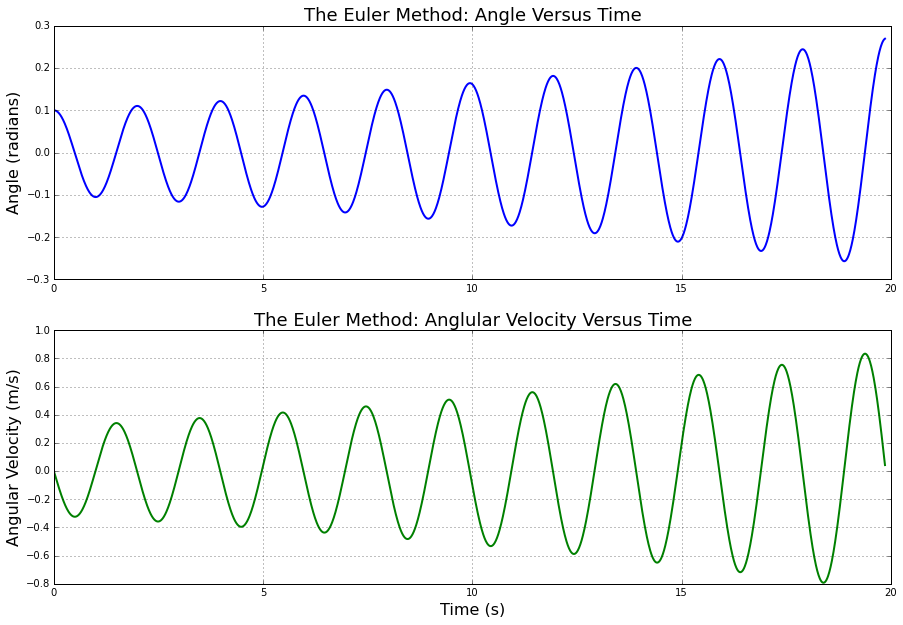

In [5]:
"""
Now that my arrays are full of the appropriate values, 
I can plot my data against time.
"""
plt.figure(1)
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(t, angle_E, linewidth= 2.0)
plt.title('The Euler Method: Angle Versus Time', fontsize = 18)
plt.ylabel('Angle (radians)', fontsize = 16)
#plt.xlabel('Time (s)', fontsize = 16)
plt.grid(True)
plt.subplot(212)
plt.plot(t,angVel_E, color='green', linewidth= 2.0)
plt.title('The Euler Method: Anglular Velocity Versus Time', fontsize = 18)
plt.ylabel('Angular Velocity (m/s)', fontsize = 16)
plt.xlabel('Time (s)', fontsize = 16)
plt.grid(True)
plt.show ()

The data which has resulted from the Euler method of referencing the initial values to build an array is clearly incorrect here. Because the pendulum in the problem is ideal, our results shoul not reflect any variation in the period of the pendulum; there are no external forces acting on the object and therefore energy should be conserved and the motion should be consistent and without damping.

In [6]:
"""
It appears that the Euler method has returned 
a graph that does not depict the expected result! 
Now I'll try the Euler-Cromer method, 
feeding the updated velocity back into the function.
This can be done using the same functions I have already defined, 
but I do have to tweak my solving function 
and restate it in order to seperate my results 
and display them side by side.
"""

def solvePend_EulerCromer(theta0, omega0, t, g, L):
    angle_EC = np.zeros(len(t))
    angVel_EC = np.zeros(len(t))
    uEC = np.zeros(len(t))
    kEC = np.zeros(len(t))
    eEC = np.zeros(len(t))

    angle_EC[0] = theta0
    angVel_EC[0] = omega0
    uEC[0], kEC[0], eEC[0] = energy(angVel_EC[0], angle_EC[0], L, m, g)
    
    for i in range(1,len(t)):
        angVel_EC[i] = omegaStep(angle_EC[i-1], angVel_EC[i-1], dt, g, L) #Euler-Cromer Method
        angle_EC[i] = thetaStep(angle_EC[i-1], angVel_EC[i], dt)
        uEC[i], kEC[i], eEC[i] = energy(angVel_EC[i-1], angle_EC[i-1], L, m, g)
    
    return angle_EC, angVel_EC, uEC, kEC, eEC
        
angle_EC, angVel_EC, uEC, kEC, eEC = solvePend_EulerCromer(theta0, omega0, t, g, L)

print("Angle Array: ", angle_EC)
print("Angular Velocity Array: ", angVel_EC)

Angle Array:  [ 0.1         0.0999      0.0997001  ...,  0.09973999  0.0999234
  0.10000689]
Angular Velocity Array:  [ 0.         -0.01       -0.01999    ...,  0.02831535  0.01834135
  0.00834901]


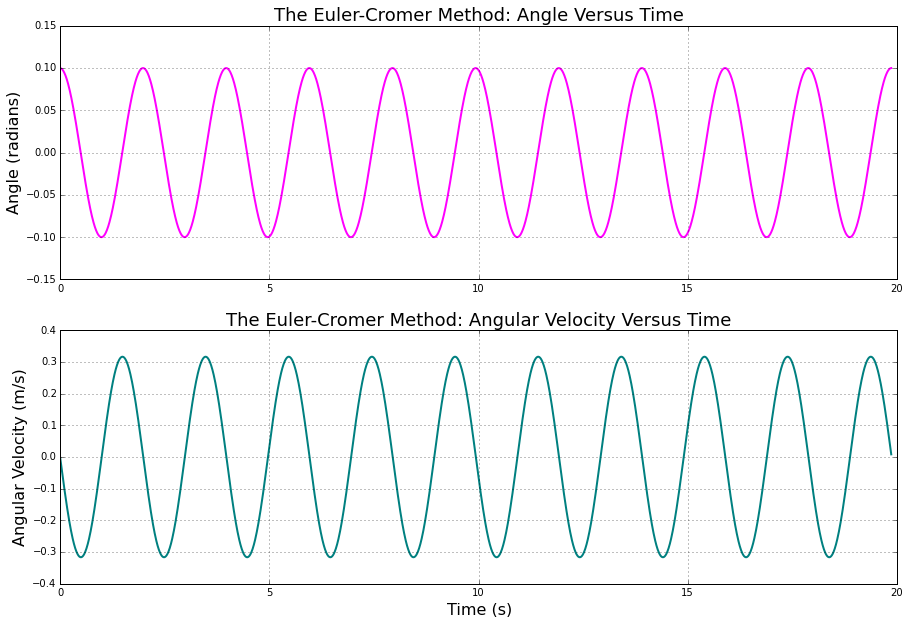

In [7]:
"""
I've changed the order of the commands and adjusted the 
angle function to receive the updated angular velocity.
Now that this rule is set and values are assigned 
I will plot the results.
"""

plt.figure(2)
plt.figure(figsize=(15,10))

plt.subplot(211)
plt.plot(t, angle_EC, color = 'magenta', linewidth= 2.0)
plt.title('The Euler-Cromer Method: Angle Versus Time', fontsize = 18)
plt.ylabel('Angle (radians)', fontsize = 16)
plt.grid(True)

plt.subplot(212)
plt.plot(t, angVel_EC, color = 'teal', linewidth= 2.0)
plt.title('The Euler-Cromer Method: Angular Velocity Versus Time', fontsize = 18)
plt.ylabel('Angular Velocity (m/s)', fontsize = 16)
plt.xlabel('Time (s)', fontsize = 16)
plt.grid(True)
plt.show ()


This data seems much more consistent with reality. Momentum and energy appear to be conserved, as they should be in the case of an ideal pendulum where $\sum \vec F_{ext} \ = \ 0 $. 

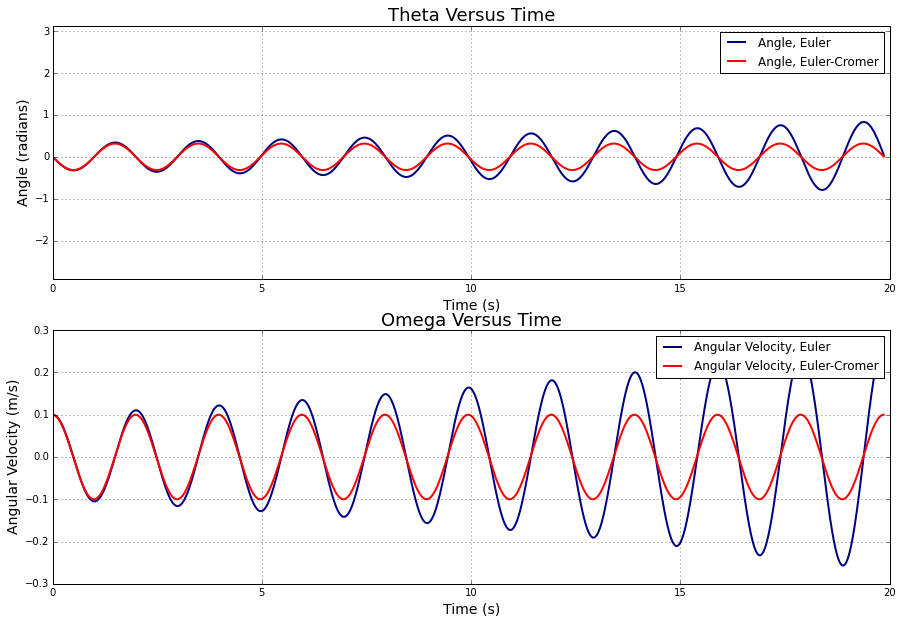

In [8]:

plt.figure(3)
plt.figure(figsize=(15,10))

plt.subplot(211)

thetaE, = plt.plot(t, angVel_E, color='navy', linewidth=2.0)
thetaEC, = plt.plot(t, angVel_EC, color='red', linewidth=2.0)

plt.axis('equal')

plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Angle (radians)', fontsize=14)
plt.grid(True)
plt.title('Theta Versus Time', fontsize=18)
#plt.xlabel('Time (s)', size = '20')
plt.legend([thetaE, thetaEC], ["Angle, Euler", "Angle, Euler-Cromer "])

plt.subplot(212)

omegaE, = plt.plot(t, angle_E, color='navy', linewidth=2.0)
omegaEC, = plt.plot(t, angle_EC, color='red', linewidth=2.0)

plt.legend([omegaE, omegaEC], ["Angular Velocity, Euler", "Angular Velocity, Euler-Cromer"])
plt.grid(True)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Angular Velocity (m/s)', fontsize=14)
plt.title('Omega Versus Time', fontsize=18)

plt.show()

This graph really illustrates how the slight variation of simply feeding the function an ammended velocity can make a world of difference- by the end of this graph the intervals are completely out of phase and the potential for gross miscalculation is obvious. The periods, however, do agree given that there is no damping on this pendulum. It is clearly important in the case of oscillation to use the Euler-Cromer method, feeding the angle step function the current index in the angular velocity array, as opposed to the previous value. But what about the energy of this pendulum?

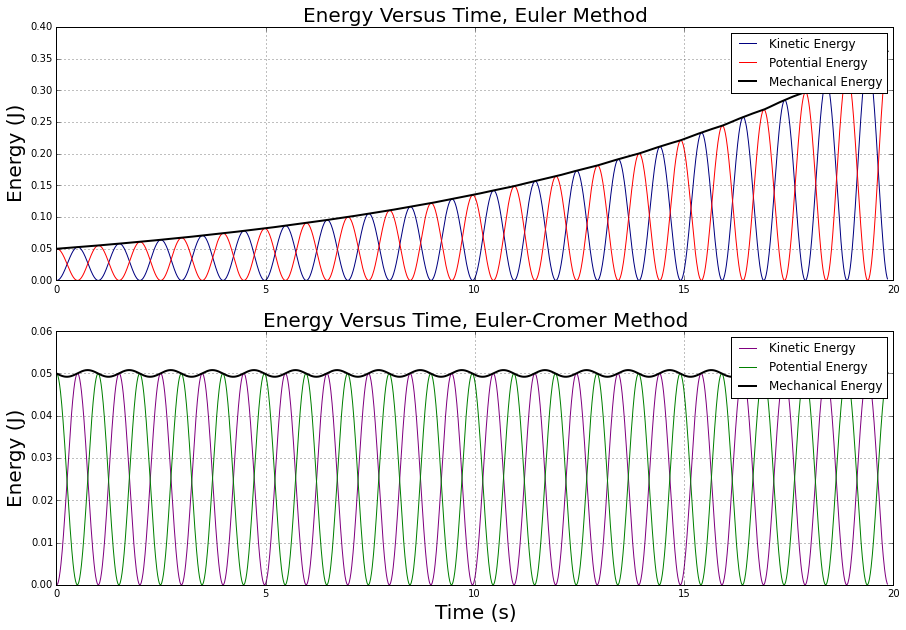

In [9]:
"""
For clarity, I want to show all the energies on the same graph 
so I will plot two graphs, each with a legend
each representing their respective methods
"""
plt.figure(4)
plt.figure(figsize=(15,10))
plt.subplot(211)
kinetic, = plt.plot(t, kEuler, color='navy', linewidth=1.0)
potential, = plt.plot(t, uEuler, color='red', linewidth=1.0)
mechanical, = plt.plot(t, eEuler, color='black', linewidth=2.0)
plt.ylabel('Energy (J)', size = '20')
plt.title('Energy Versus Time, Euler Method', size = '20')
#plt.xlabel('Time (s)', size = '20')
plt.legend([kinetic, potential, mechanical], ["Kinetic Energy", "Potential Energy", "Mechanical Energy"])
plt.grid(True)
plt.subplot(212)
kinetic, = plt.plot(t, kEC, color='purple', linewidth=1.0)
potential, = plt.plot(t, uEC, color='green', linewidth=1.0)
mechanical, = plt.plot(t, eEC, color='black', linewidth=2.0)
plt.ylabel('Energy (J)', size = '20')
plt.title('Energy Versus Time, Euler-Cromer Method', size = '20')
plt.xlabel('Time (s)', size = '20')
plt.legend([kinetic, potential, mechanical], ["Kinetic Energy", "Potential Energy", "Mechanical Energy"])
plt.grid(True)
plt.show()

Looking at the total mechanical energy for the two methods, it is immediately clear which conserves energy better; the Euler method returns an increasing energy whereas the Euler-Cromer method shows the total energy oscillating around 0.05 Joules. Similarly we can see this difference in the kinetic and potential energies.